# Machine Learning Approach in Analyzing Data on Internshala

In [160]:
import numpy as np
import pandas as pd
import functions as func
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
from scipy import stats
from scipy.special import boxcox, inv_boxcox
!pip install verstack
!pip install lightbgm


warnings.filterwarnings('ignore')

  Using cached MarkupSafe-2.1.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [161]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(8,6.4)})

## Loading Data

In [162]:
data = pd.read_csv("Scraper/venv/all_internships_210123_183812.csv",encoding='latin1')
data.head()

,category,company,location,start_date,duration,stipend,apply_by,applicants,skills_required,perks,openings,link
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://internshala.com/job/detail/inside-sale...
1,Cloud Development (Backend),Techwondoe India Private Limited,"Work From Home,",Immediately,3 Months,"10,000-25,000 /month",5 Feb' 23,861.0,"Amazon Web Server (AWS),Node.js,REST API,Tailw...","Certificate,Letter of recommendation,5 days a ...",2.0,https://internshala.com/internship/detail/clou...
2,Fundraising,Tare Zameen Foundation,"Work From Home,",Immediately,1 Month,"1,000 /month + Incentives",3 Feb' 23,186.0,NaN,"Certificate,Letter of recommendation,Flexible ...",200.0,https://internshala.com/internship/detail/fund...
3,Brand Management &amp; Marketing,Corizo,"Work From Home,",Immediately,1 Month,"1,000 /month + Incentives",2 Feb' 23,405.0,"Email Marketing,Instagram Marketing,Social Med...","Certificate,Letter of recommendation,Job offer,",20.0,https://internshala.com/internship/detail/bran...
4,Android Teaching Assistant (Virtual),Internshala Trainings,"Work From Home,",Immediately,6 Months,"5,000 /month + Incentives",27 Jan' 23,225.0,"Android,Kotlin,","Certificate,Flexible work hours,",2.0,https://internshala.com/internship/detail/andr...


In [163]:
print(data.shape)

(9286, 12)


The functions.univariate is a Python function written explicitly to create a summary of all the univariate columns.

In [164]:
func.univariate(data)

,Dtype,Numeric,Count,Missing,Unique,Mean,Min,25%ile,Median,75%ile,Max,Mode,Std,Skewness,Kurtosis
openings,float64,True,9261,25,43,6.20149,1.0,1.0,2.0,4.0,5000.0,2.0,67.087765,56.32879,3772.764395
applicants,float64,True,9269,17,472,46.793937,0.0,0.0,0.0,53.0,999.0,0.0,105.042076,4.570012,26.404672
duration,object,False,9269,17,16,-,-,-,-,-,-,3 Months,-,-,-
start_date,object,False,9269,17,28,-,-,-,-,-,-,Immediately,-,-,-
apply_by,object,False,9269,17,31,-,-,-,-,-,-,31 Jan' 23,-,-,-
perks,object,False,8748,538,116,-,-,-,-,-,-,"Certificate,Letter of recommendation,Flexible ...",-,-,-
stipend,object,False,9269,17,407,-,-,-,-,-,-,"5,000 /month",-,-,-
location,object,False,9277,9,517,-,-,-,-,-,-,"Work From Home,",-,-,-
category,object,False,9269,17,2249,-,-,-,-,-,-,Business Development (Sales),-,-,-
skills_required,object,False,7802,1484,3767,-,-,-,-,-,-,"English Proficiency (Spoken),English Proficien...",-,-,-


Out of 12 features, only "openings" and "applicants" are in integer type. "Duration" and "Stipend" should also be an integer type. Also, there are at least 17 missing values for all features except "link", indicating empty rows during the data extraction stage. It is crucial to find out the reason for the same. Upon inspecting a few links with blank entities, it was found that the "Internshala" website was promoting a new Job offer which was shown on top on many pages. This also justifies the reason for having duplicate links during web scraping. Also, there were cases of internships that were closed for applicants, and therefore, returned empty values.

First of all, removing the blank entities is essential.

In [165]:
emptyRowIndex = data[data['company'].isna()].index

In [166]:
data = data.drop(index=emptyRowIndex)

In [167]:
func.univariate(data)

,Dtype,Numeric,Count,Missing,Unique,Mean,Min,25%ile,Median,75%ile,Max,Mode,Std,Skewness,Kurtosis
openings,float64,True,9261,8,43,6.20149,1.0,1.0,2.0,4.0,5000.0,2.0,67.087765,56.32879,3772.764395
applicants,float64,True,9269,0,472,46.793937,0.0,0.0,0.0,53.0,999.0,0.0,105.042076,4.570012,26.404672
duration,object,False,9269,0,16,-,-,-,-,-,-,3 Months,-,-,-
start_date,object,False,9269,0,28,-,-,-,-,-,-,Immediately,-,-,-
apply_by,object,False,9269,0,31,-,-,-,-,-,-,31 Jan' 23,-,-,-
perks,object,False,8748,521,116,-,-,-,-,-,-,"Certificate,Letter of recommendation,Flexible ...",-,-,-
stipend,object,False,9269,0,407,-,-,-,-,-,-,"5,000 /month",-,-,-
location,object,False,9269,0,516,-,-,-,-,-,-,"Work From Home,",-,-,-
category,object,False,9269,0,2249,-,-,-,-,-,-,Business Development (Sales),-,-,-
skills_required,object,False,7802,1467,3767,-,-,-,-,-,-,"English Proficiency (Spoken),English Proficien...",-,-,-


## Data Cleaning

### Stipend

First of all, check all the values of Stipend which do not start with a number. This could be because of other currencies, Unpaid Stipends, or Performance-Based stipends.

In [168]:
print(data[data['stipend'].str.match(r'^[a-zA-Z]+',na=False)]['stipend'].unique())

['Performance Based' 'Unpaid' 'Not provided']


The main target variable is the stipend. It can be seen that there are "Performance Based", "Unpaid" and "Not Provided" values.

The following things can be done:

- Create a new CSV file with all the "Performance Based" and "Unpaid" internships (might be useful later)

- Drop all the rows with the "Not Provided" stipend

- Change dtype to int

In [169]:
unpaid_data = data[(data['stipend']=='Performance Based') | (data['stipend']=='Unpaid')]
unpaid_data.to_csv('Files/unpaid_data.csv', index=False)

# Dropping these values from main data
data.drop(unpaid_data.index, inplace=True)

In [170]:
# Dropping all not provided stipend rows
data.drop(data[data['stipend']=='Not provided'].index, inplace=True)
data.drop(data[data['stipend'].isna()].index, inplace=True)

In [171]:
# For changing datatype to int, all text values have to be removed.
# For values having range, the values can be averaged.
_ = data['stipend'].apply(lambda x: str(x).split(' ')[0].replace(',',"").split("-"))
lower = (_.apply(lambda x:x[0])).astype('float32')
upper = (_.apply(lambda x:x[-1])).astype('float32')
data['stipend'] = (lower+upper)/2

At this point, the contribution of unpaid or stipend-based internships on Internshala can be calculated.

In [172]:
percent_unpaid_stipendbased = len(unpaid_data)/(len(unpaid_data)+len(data))*100
print("The contribution of unpaid interships out of total: ",round(percent_unpaid_stipendbased,2),"%")

The contribution of unpaid interships out of total:  2.98 %


### Duration

A different analysis of null values, value counts, and data types is performed to understand the operations to be completed.

In [173]:
print(data['duration'].isna().sum())

0


In [174]:
print(data['duration'].value_counts())

3 Months        3486
6 Months        2987
2 Months        1214
1 Month          604
4 Months         479
5 Months          79
1 Week            34
2 Weeks           34
6 Weeks           26
4 Weeks           12
36 Months          9
3 Weeks            7
24 Months          7
12 Months          6
Not Provided       2
12 months          1
Name: duration, dtype: int64


There are no empty values for duration, but there are 2 columns with "Not Provided" values.

As duration is an essential feature of the dataset, the not provided rows are dropped.

In [175]:
data.drop(data[data['duration']=='Not Provided'].index, inplace=True)

As the value of the duration column is in weeks and months, converting all of them into months is practical. After all the values are in the same unit, the column can be converted to an integer datatype.

In [176]:
# First creating a separate column where the 'week or day multiplier' consists of either 4 or 1. If it is a week, 4 is divided to the value in duration column, else 1
week_or_day_multiplier = (data['duration'].apply(lambda x: 4 if "Week" in str(x) else 1))
# Taking out the only integer value of duration column and dividing it with week_or_day_multiplier so that all the values are in months only.
data['duration'] = (data['duration'].apply(lambda x: int(str(x).split(' ')[0]))/week_or_day_multiplier)

In [177]:
print(data['duration'].value_counts())

3.00     3486
6.00     2987
2.00     1214
1.00      616
4.00      479
5.00       79
0.50       34
0.25       34
1.50       26
36.00       9
0.75        7
24.00       7
12.00       7
Name: duration, dtype: int64


### Category

In [178]:
print(data['category'].isna().sum())

0


In [179]:
print(data['category'].nunique())

2194


In [180]:
# As the output has 2194 rows, it cannot be displayed here, therefore creating a csv and then analysing it
_ = (data['category'].value_counts())
_.to_csv('Files/cateogry_value_counts().csv',index=True)

There are 2194 unique categories. Upon inspection, the following are observed:
* Many categories are too specific, such as teaching (Maths), Teaching (Mathematics), Teaching(Science), etc. To generalize this, all rows having values in brackets or '-' are treated and removed.
* There are categories with '&amp', which is nothing but '&'. Treating such values would be beneficial

In [181]:
data['category'] = (data['category'].apply(lambda x: str(x).split('(')[0].split('-')[0].split('&amp;')[0].strip()))
data['category'] = (data['category'].apply(lambda x: 'Teaching' if 'teaching' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: '2D/3D' if '2D' in str(x) else x))
data['category'] = (data['category'].apply(lambda x: '2D/3D' if '3D' in str(x) else x))
data['category'] = (data['category'].apply(lambda x: 'Content Writing/Creation Related' if 'content' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Graphic Desing Realted' if 'graphic' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Video Editing/Making/Animation Related' if 'video' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Database Operations' if 'database' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Data_Entry Related' if 'data entry' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Data_Entry Related' if 'data typing' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Data_Annotation' if 'data annotation' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Data_Analysis/Data_Science' if 'data' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Research' if 'research' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Web Development/Design' if 'web ' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'UI/UX' if 'ui' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'UI/UX' if 'ux' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'B2B Related' if 'b2b' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Google AdWords' if 'google ad' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Social Media Related' if 'social media' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Journalism' if 'journalism' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Subject Matter Expert' if 'subject matter' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Teaching' if 'tutor' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: x.replace('Analytics','Analysis').replace('Analyst','Analysis')))
data['category'] = (data['category'].apply(lambda x: 'Business Analysis' if 'business analysis' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Operations' if 'operations ' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Finance' if 'financial' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Finance' if 'finance' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Architecture' if 'architectur' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Search Engine Optimization' if 'seo' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: '.js Development' if '.js' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: '.js Development' if 'react' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: '.js Development' if 'angular' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Human Resources' if 'hr ' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Human Resources' if '/hr' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Human Resources' if 'HR' in str(x) else x))
data['category'] = (data['category'].apply(lambda x: 'Charity' if 'charity' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Anchoring' if 'anchor' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'CAD' if 'cad ' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Chartered Accountancy' if 'ca ' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Chartered Accountancy' if 'ca/' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Chartered Accountancy' if 'CA' in str(x) else x))
data['category'] = (data['category'].apply(lambda x: 'Academics Related' if 'academic' in str(x).lower() else x))
data['category'] = (data['category'].apply(lambda x: 'Website Development Related' if bool(re.search('(?i)web(site|page|flow|/E|[3])? ?($|\s)',str(x).lower())) else x))

In [182]:
print(data['category'].nunique())

1099


In [183]:
unique_categories = (data['category'].unique().tolist())

# Creating a txt file of all categories to use later
with open(r'Files/categories_list.txt','w') as fp:
    for item in unique_categories:
        fp.write("%s\n" % item)
    print("Made categories list successfully. File name: 'Files/categories_list.txt'")

Made categories list successfully. File name: 'Files/categories_list.txt'


After merging many similar categories, the number of categories has been reduced from 2194 to 1099.

### Skills Required

In [184]:
# Making a different array of skills with elements as list
skills_array = data['skills_required'].apply(lambda x: str(x).split(',')[:-1])
# Creating a 1d list
skills_list = [item for sublist in skills_array for item in sublist]

#Counting the occurences of each skill
from collections import Counter
skills_list = dict(Counter(skills_list))

# Sorting in ascending order for later use
sorted_skills_list = sorted(skills_list.keys())
# Sorting in descending order for plotting purpose
skills_list_toPlot = dict(sorted(skills_list.items(),key=lambda x:x[1], reverse=True))
reverse_skills_dict = dict((sorted(skills_list.items(),key=lambda x:x[1],reverse=False)))

print("All Skills with their occurences: ",skills_list_toPlot)
print("Total unique skills: ",len(skills_list_toPlot))

All Skills with their occurences:  {'English Proficiency (Written)': 2690, 'English Proficiency (Spoken)': 2676, 'Social Media Marketing': 1466, 'MS-Excel': 1435, 'Digital Marketing': 1386, 'Creative Writing': 1006, 'Adobe Photoshop': 910, 'MS-Office': 881, 'Search Engine Optimization (SEO)': 875, 'Email Marketing': 790, 'Adobe Illustrator': 677, 'Instagram Marketing': 634, 'Video Editing': 585, 'Facebook Marketing': 534, 'MS-Word': 445, 'Adobe After Effects': 422, 'Search Engine Marketing (SEM)': 420, 'Adobe Premiere Pro': 414, 'Content Writing': 390, 'Sales and Marketing': 367, 'HTML': 339, 'JavaScript': 312, 'Blogging': 311, 'Hindi Proficiency (Spoken)': 303, 'Canva': 286, 'MS-PowerPoint': 282, 'CSS': 275, 'Video Making': 271, 'CorelDRAW': 269, 'UI & UX Design': 245, 'Content Marketing': 236, 'Sales': 205, 'WordPress': 197, 'Adobe Indesign': 189, 'Adobe Creative Suite': 187, 'PHP': 185, 'Adobe Photoshop Lightroom CC': 176, 'Python': 176, 'ReactJS': 174, 'Accounting': 174, 'Node.js':

In [185]:
# Directly 'in' cannot be used as 'in' does not prioritize the least occuring skill. As the skills_to_remove list arranged in ascending order of occurances, the least occuring skill will be returned
def leastOccuringSkill(skill_array,no_skills_grouped): # no_skills_grouped is the number of occurences of a skill that can be grouped with no effect on stipend
    skills_occurances = []
    for skill in skill_array:
        skills_occurances.append(reverse_skills_dict.get(skill))
    if(len(skills_occurances)==0):
        return np.nan
    min_value = min(skills_occurances)
    if min_value<=no_skills_grouped:
        return skill_array[skills_occurances.index(min_value)]
    else:
        return np.nan

def perform_anova_for_skills(skills_stipend_df,numberOfSkillsToBeGrouped):
    skills_stipend_df.loc[:,'least_skill'] = (skills_stipend_df['skills_required'].apply(lambda x: leastOccuringSkill(str(x).split(',')[:-1],numberOfSkillsToBeGrouped)))
    skills_stipend_df.dropna(subset=['least_skill'],inplace=True)
    skills_stipend_df = skills_stipend_df[['least_skill','stipend']]
    result=func.anova(skills_stipend_df,'least_skill','stipend')
    print("ANOVA result for grouping skills with ",numberOfSkillsToBeGrouped," occurences :",result)
    return result[1]

As there are many skills with counts very less, say n. It can be thought that these skills do not have any effect on the stipend. Therefore, a hypothesis is created:

Null Hypothesis: All skills with n or fewer occurrences do not exhibit a significant difference when predicting the stipend.

Alternate Hypothesis: All skills with n or fewer occurrences do exhibit a significant difference when predicting the stipend.

One-way ANOVA is performed.

In [186]:
skills_stipend = data[['skills_required','stipend']]

grouping_skills_with_occurences=2
grouping_skills_with_occurences-=1 #To overcome '+1' in '*' line
while True:
    skills_stipend = data[['skills_required','stipend']] #To overcome slicing
    res = perform_anova_for_skills(skills_stipend,grouping_skills_with_occurences+1) # '*' line
    if res<0.05:
        break
    grouping_skills_with_occurences+=1

print("Skills with ",grouping_skills_with_occurences,' occurences can be grouped')

ANOVA result for grouping skills with  2  occurences : F_onewayResult(statistic=0.9734593534638845, pvalue=0.5574502617710357)
ANOVA result for grouping skills with  3  occurences : F_onewayResult(statistic=1.2607629989407607, pvalue=0.1627805231428586)
ANOVA result for grouping skills with  4  occurences : F_onewayResult(statistic=1.4206184032488673, pvalue=0.03686195179230669)
Skills with  3  occurences can be grouped


There are many skills required for one internship. Therefore, direct comparison or count of skills was not possible. Therefore, another approach is taken.

Also, there are many skills with very less occurrences. A good approach is to group the skills with very less occurrences as 'Others'. To find out how many significantly 'less occurrences' can be grouped, a variable no_of_skills_to_be_grouped is introduced.

The following steps are performed in the above executions:

- All the individual skills for each internship are split into a 1-dimensional array which is then passed through Counter to count occurrences of each skill.

- The above-obtained result is then arranged in ascending and descending order of their occurrences for further use.

- As many internship postings have more than one skill required, the function leastOccuringSkill takes parameters as the list of skills for one internship along with the number of skills that are to be grouped (explained before as no_of_skills_to_be_grouped). Among all the skills required for one internship, the skill with minimum occurrence is returned. If there is more than one skill with the same number of occurrences then the one with alphabetically the first occurrence is returned. Though, if the minimum occurrence skill has more occurrences than no_of_skills_to_be_grouped, the function returns NaN.

- The function perform_anovs_for_skills takes parameters as a df with only skills and stipends sliced from the original data, and the no_of_skills_to_be_grouped. 

- The above function creates a new column in the input df. The said new column is created by passing a list of skills_required for each internship along with no_of_skills_to_be_grouped to leastOccuringSkill to get the skill that has the least occurrence among the list and is less than or equal to no_of_skills_to_be_grouped.

- The original skills_required column is dropped and the resulting df is passed to the ANOVA function with parameters.

- The above-said process does the following in brief:

1. Takes the input a df slice of skills_required and stipend.

undefined. Find outs the minimum skill with the least occurrence among all. Returns NaN if the number of occurrences of minimum skill for an internship is less than no_of_skills_to_be_grouped.

undefined. The returned data is then forwarded for ANOVA testing returning the p-value of the one-way ANOVA test.

- The above-said process can be performed on the data with specific no_of_skills_to_be_grouped. As the main objective is to find no_of_skills_to_be_grouped, a loop, starting from 2, runs the above process till the Null Hypothesis of ANOVA is rejected. This finds the final number of occurrences of which the skills can be grouped to 'Others'

Changing above found skills to 'Others'

As the use of skill as an array cannot be done directly in our analysis, a new dataframe is created for skills only.

In [187]:
skills_to_be_edited = reverse_skills_dict.copy()
key_list = list(skills_to_be_edited.keys())
for key in key_list:
    if skills_to_be_edited.get(key)<=grouping_skills_with_occurences:
        skills_to_be_edited.update({key:'Others'})
    else:
        skills_to_be_edited.update({key:key})

unique_final_skills = (skills_to_be_edited.values())
print("Unique Skills after merging not significant skills as 'Others': ",pd.Series(unique_final_skills).nunique())

# Creating a txt file of all skills to use later
with open(r'Files/skills_list.txt','w') as fp:
    for item in pd.Series(unique_final_skills).unique():
        fp.write("%s\n" % item)
    print("Made skills list successfully. File name: 'Files/skills_list.txt'")

def modify_list(skill_list):
    new_list = []
    for list_item in skill_list:
        new_list.append(skills_to_be_edited.get(list_item))
    return new_list

data_skills = pd.DataFrame(data['skills_required'].apply(lambda x: modify_list(str(x).split(',')[:-1])))


Unique Skills after merging not significant skills as 'Others':  267
Made skills list successfully. File name: 'Files/skills_list.txt'


### Location

In [188]:
# Making a different array of location with elements as list
data['location']=(data['location'].apply(lambda x:x.replace(", ",",")))
location_array = data['location'].apply(lambda x: str(x).split(',')[:-1])
# Creating a 1d list
location_list = [item for sublist in location_array for item in sublist]

#Counting the occurences of each skill
from collections import Counter
location_list = dict(Counter(location_list))

# Sorting in ascending order for later use
sorted_location_list = sorted(location_list.keys())
# Sorting in descending order for plotting purpose
locations_list_toPlot = dict(sorted(location_list.items(),key=lambda x:x[1], reverse=True))
reverse_location_dict = dict((sorted(location_list.items(),key=lambda x:x[1],reverse=False)))

print("All Location with their occurences: ",locations_list_toPlot)
print("Total unique locations: ",len(locations_list_toPlot))

All Location with their occurences:  {'Work From Home': 3572, 'Mumbai': 1088, 'Delhi': 975, 'Bangalore': 708, 'Gurgaon': 506, 'Noida': 460, 'Pune': 399, 'Jaipur': 217, 'Hyderabad': 208, 'Ahmedabad': 195, 'Chennai': 182, 'Navi Mumbai': 132, 'Kolkata': 129, 'Thane': 110, 'Indore': 102, 'Ghaziabad': 93, 'Chandigarh': 85, 'Mohali': 85, 'Faridabad': 56, 'Lucknow': 47, 'Vadodara': 44, 'Bhopal': 32, 'Dehradun': 31, 'Greater Noida': 31, 'Coimbatore': 28, 'Kalyan': 28, 'Nagpur': 27, 'Surat': 26, 'Kochi': 25, 'Pimpri-Chinchwad': 22, 'Raipur': 21, 'Gandhinagar': 21, 'Udaipur': 20, 'Dombivli': 20, 'Ludhiana': 19, 'Mira Bhayandar': 18, 'Nashik': 17, 'Panchkula': 17, 'Bhubaneswar': 17, 'Varanasi': 17, 'Rajkot': 16, 'Ambernath': 15, 'Ulhasnagar': 14, 'Patna': 14, 'Panvel': 14, 'Kharar': 13, 'Ranchi': 11, 'Vashi': 11, 'Visakhapatnam': 11, 'Jodhpur': 10, 'Amritsar': 10, 'Ernakulam': 10, 'Gautam Buddha Nagar': 10, 'Bhiwandi': 9, 'Agra': 9, 'Vasai-Virar': 9, 'Cochin': 9, 'Jalandhar': 8, 'Kota': 8, 'Zirak

In [189]:
# Directly 'in' cannot be used as 'in' does not prioritize the least occuring location. As the locations_to_remove list arranged in ascending order of occurances, the least occuring location will be returned
def leastOccuringLocation(location_array,no_locations_grouped): # no_locations_grouped is the number of occurences of a location that can be grouped with no effect on stipend
    locations_occurances = []
    for location in location_array:
        locations_occurances.append(reverse_location_dict.get(location))
    if(len(locations_occurances)==0):
        return np.nan
    min_value = min(locations_occurances)
    if min_value<=no_locations_grouped:
        return location_array[locations_occurances.index(min_value)]
    else:
        return np.nan

def perform_anova_for_locations(locations_stipend_df,numberOfLocationsToBeGrouped):
    locations_stipend_df.loc[:,'least_location'] = (locations_stipend_df['location'].apply(lambda x: leastOccuringLocation(str(x).split(',')[:-1],numberOfLocationsToBeGrouped)))
    locations_stipend_df.dropna(subset=['least_location'],inplace=True)
    locations_stipend_df = locations_stipend_df[['least_location','stipend']]
    result=func.anova(locations_stipend_df,'least_location','stipend')
    print("ANOVA result for grouping locations with ",numberOfLocationsToBeGrouped," occurences :",result)
    return result[1]

As there are many locations with counts very less, say n. It can be thought that these locations do not have any effect on the stipend. Therefore, a hypothesis is created:

Null Hypothesis: All locations with n or fewer occurrences do not exhibit a significant difference when predicting the stipend.

Alternate Hypothesis: All locations with n or fewer occurrences do exhibit a significant difference when predicting the stipend.

One-way ANOVA is performed.

In [190]:
locations_stipend = data[['location','stipend']]

grouping_locations_with_occurences=2
grouping_locations_with_occurences-=1 #To overcome '+1' in '*' line
while True:
    locations_stipend = data[['location','stipend']] #To overcome slicing
    res = perform_anova_for_locations(locations_stipend,grouping_locations_with_occurences+1) # '*' line
    if res<0.05:
        break
    grouping_locations_with_occurences+=1

print("Locations with ",grouping_locations_with_occurences,' occurences can be grouped')

ANOVA result for grouping locations with  2  occurences : F_onewayResult(statistic=1.369014699380805, pvalue=0.22400324975952302)
ANOVA result for grouping locations with  3  occurences : F_onewayResult(statistic=1.0201454011405766, pvalue=0.4845624488526254)
ANOVA result for grouping locations with  4  occurences : F_onewayResult(statistic=1.1539539065383302, pvalue=0.22607786729279614)
ANOVA result for grouping locations with  5  occurences : F_onewayResult(statistic=1.2854238534929188, pvalue=0.07275435045304965)
ANOVA result for grouping locations with  6  occurences : F_onewayResult(statistic=1.3537544160229593, pvalue=0.03358561536139814)
Locations with  5  occurences can be grouped


After performing a similar ANOVA Analysis as done in skills_required, the test rejects the null hypothesis even for n=6. Therefore, locations with up to 5 occurrences can be grouped.

Changing above found locations to 'Others'

As the use of locations as an array cannot be done directly in our analysis, a new dataframe is created for locations only.

In [191]:
locations_to_be_edited = reverse_location_dict.copy()
key_list = list(locations_to_be_edited.keys())
for key in key_list:
    if locations_to_be_edited.get(key)<=grouping_locations_with_occurences:
        locations_to_be_edited.update({key:'Others'})
    else:
        locations_to_be_edited.update({key:key})

unique_final_locations = (locations_to_be_edited.values())
print("Unique Locations after merging not significant locations as 'Others': ",pd.Series(unique_final_locations).nunique())

# Creating a txt file of all locations to use later
with open(r'Files/locations_list.txt','w') as fp:
    for item in pd.Series(unique_final_locations).unique():
        fp.write("%s\n" % item)
    print("Made locations list successfully. File name: 'Files/locations_list.txt'")

def modify_list(location_list):
    new_list = []
    for list_item in location_list:
        new_list.append(locations_to_be_edited.get(list_item))
    return new_list

data_locations = pd.DataFrame(data['location'].apply(lambda x: modify_list(str(x).split(',')[:-1])))


Unique Locations after merging not significant locations as 'Others':  72
Made locations list successfully. File name: 'Files/locations_list.txt'


In [192]:
unique_significant_locations = list(pd.Series(locations_to_be_edited.values()).unique())

In [193]:
# Creating data to be used later in visualization
loc = []
stip = []
for index, row in data.iterrows():
    locations = (row['location']).split(',')[:-1]
    for location in locations:
        if location in unique_significant_locations:
            loc.append(location)
        else:
            loc.append('Others')
        stip.append(row['stipend'])
location_stipend_data = pd.DataFrame(list(zip(loc,stip)),columns = ['location','stipend'])

### Perks

In [194]:
# Making a different array of perk with elements as list
perk_array = data['perks'].apply(lambda x: str(x).split(',')[:-1])
# Creating a 1d list
perk_list = [item for sublist in perk_array for item in sublist]

#Counting the occurences of each skill
from collections import Counter
perk_list = dict(Counter(perk_list))

# Sorting in ascending order for later use
sorted_perk_list = sorted(perk_list.keys())
# Sorting in descending order for plotting purpose
perks_list_toPlot = dict(sorted(perk_list.items(),key=lambda x:x[1], reverse=True))

print("All Location with their occurences: ",perks_list_toPlot)
print("Total unique perks: ",len(perks_list_toPlot))

All Location with their occurences:  {'Certificate': 7683, 'Letter of recommendation': 6110, 'Flexible work hours': 4245, '5 days a week': 3178, 'Informal dress code': 2688, 'Job offer': 2197, 'Free snacks & beverages': 1158}
Total unique perks:  7


In [195]:
# Creating a txt file of all locations to use later
with open(r'Files/perks_list.txt','w') as fp:
    for item in sorted_perk_list:
        fp.write("%s\n" % item)
    print("Made perks list successfully. File name: 'Files/perks_list.txt'")

data_perks = pd.DataFrame(data['perks'].apply(lambda x: (str(x).split(',')[:-1])))

Made perks list successfully. File name: 'Files/perks_list.txt'


## Data Preprocessing

Generally, dummies are created just before pre-modeling but there are chances of more values getting dropped due to outliers later, and then the indices of 'data_skills' and 'data_locations' would be different. To avoid this, the dummies are stored in a different dataset right now and later will be merged with the original data frame.

### Skills Required

In [196]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

sklist = list(data_skills['skills_required'])
skills_dummy_values = mlb.fit_transform(sklist)
_ = mlb.classes_
skills_dummy_classes = ["skill_"+x for x in _]
skills_dummies = pd.DataFrame(skills_dummy_values,columns=skills_dummy_classes, index=data.index)
skills_dummies.sample(3)

,skill_.NET,skill_3ds Max,skill_AJAX,skill_ANSYS,skill_ARM Microcontroller,skill_ASP.NET,skill_Accounting,skill_Acting Audition,skill_Acting technique,skill_Adobe After Effects,...,skill_Web Application Security,skill_Webflow,skill_Wireframing,skill_WordPress,skill_XML,skill_Xcode,skill_YouTube Ads,skill_iOS,skill_jQuery,skill_web3.js
7729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Location

In [197]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

loclist = list(data_locations['location'])
location_dummy_values = mlb.fit_transform(loclist)
_ = mlb.classes_
location_dummy_classes = ["location_"+x for x in _]
location_dummies = pd.DataFrame(location_dummy_values,columns=location_dummy_classes, index=data.index)
location_dummies.sample(3)

,location_Agra,location_Ahmedabad,location_Ambernath,location_Amritsar,location_Badlapur,location_Bangalore,location_Bhilai,location_Bhiwandi,location_Bhopal,location_Bhubaneswar,...,location_Ulhasnagar,location_Vadodara,location_Varanasi,location_Vasai,location_Vasai-Virar,location_Vashi,location_Vijayawada,location_Visakhapatnam,location_Work From Home,location_Zirakpur
2341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Perks

In [198]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

perklist = list(data_perks['perks'])
perk_dummy_values = mlb.fit_transform(perklist)
_ = mlb.classes_
perk_dummy_classes = ["perk_"+x for x in _]
perk_dummies = pd.DataFrame(perk_dummy_values,columns=perk_dummy_classes, index=data.index)
perk_dummies.sample(3)

,perk_5 days a week,perk_Certificate,perk_Flexible work hours,perk_Free snacks & beverages,perk_Informal dress code,perk_Job offer,perk_Letter of recommendation
721,1,1,1,0,0,0,1
5735,1,1,1,0,0,0,1
6145,1,0,0,0,0,0,0


### Category

In [199]:
category_dummies = pd.get_dummies(data[['category']])

## Analysis

### Exploratory Data Analysis 

In [243]:
data.shape

(8569, 15)

In [200]:
_ = data['category'].value_counts().reset_index()[0:20]
_.rename(columns={'index':'Category','category':'Count'},inplace=True)

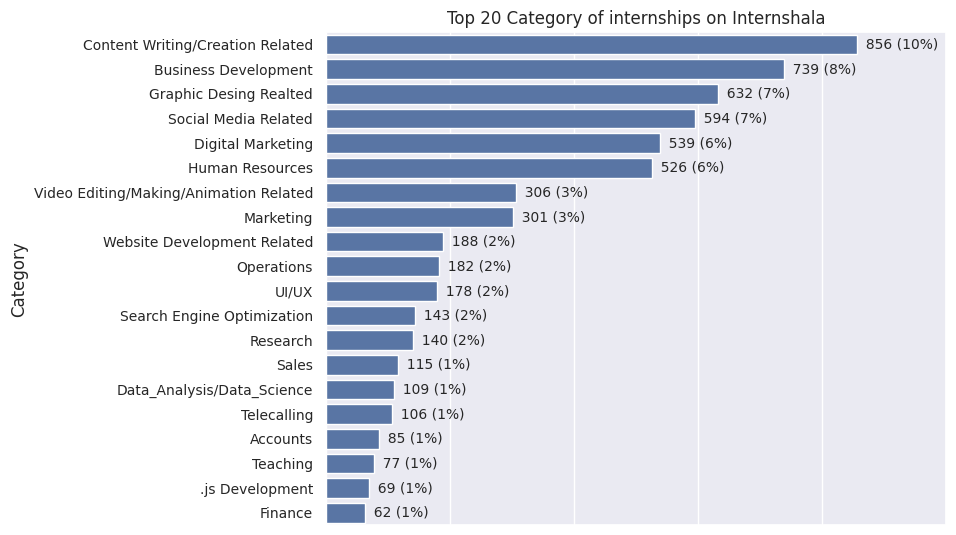

In [201]:
total = data.shape[0]
abs_values = _['Count'].apply(lambda x: "  "+str(x)+" ("+str(int(round(x/total*100,0)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Category',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,1000))
ax.tick_params(bottom=False)
ax.set(title='Top 20 Category of internships on Internshala')
plt.savefig('/work/static/category-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


In [202]:
_ = data['company'].value_counts().reset_index()[0:20]
_.rename(columns={'index':'Company','company':'Count'},inplace=True)

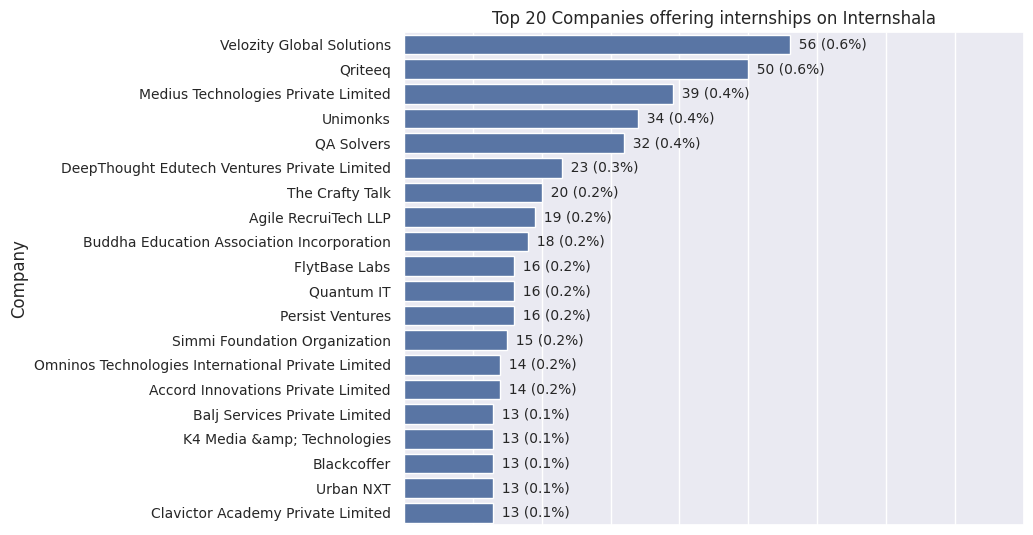

In [203]:
total = data.shape[0]
abs_values = _['Count'].apply(lambda x: "  "+str(x)+" ("+str((round(x/total*100,1)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Company',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,90))
ax.tick_params(bottom=False)
ax.set(title='Top 20 Companies offering internships on Internshala')
plt.savefig('static/company-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


In [247]:
_ = data.groupby('company').sum()['openings'].sort_values(ascending=False).reset_index()[0:20]
_.rename(columns={'company':'Company','openings':'Count'},inplace=True)

In [245]:
print("Total Offerings on Internshala: ",data['openings'].sum())

Total Offerings on Internshala:  36607.0


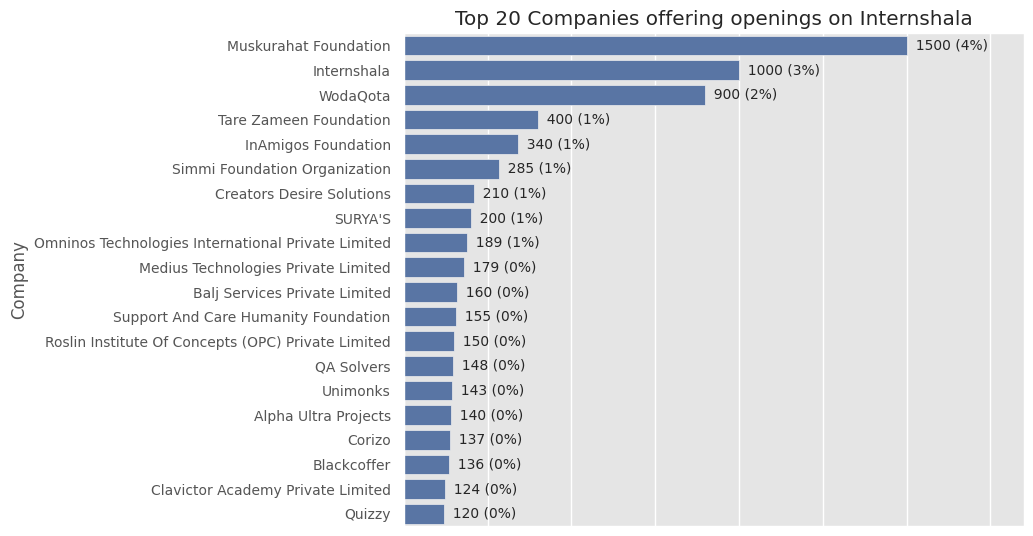

In [248]:
total = data['openings'].sum()
abs_values = _['Count'].apply(lambda x: "  "+str(int(x))+" ("+str(int(round(x/total*100,0)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Company',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,1850))
ax.tick_params(bottom=False)
ax.set(title='Top 20 Companies offering openings on Internshala')
plt.savefig('static/company-offering-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


In [206]:
_ = data['duration'].value_counts().reset_index()[0:20]
_.rename(columns={'index':'Duration','duration':'Count'},inplace=True)
# _['Duration'] = _['Duration'].apply(lambda x: str(int(x))+" Months" if float(x)%%1 else "1 Month" if float(x)==1.0 else str(float(x))+" Months")
_['Duration'] = _['Duration'].apply(lambda x: str(int(x))+" Month" if float(x)==1 else str(float(x))+" Months" if (float(x)>1 and float(x)%1!=0) else str(float(x))+" Month" if float(x)<1 else str(int(x))+" Months")

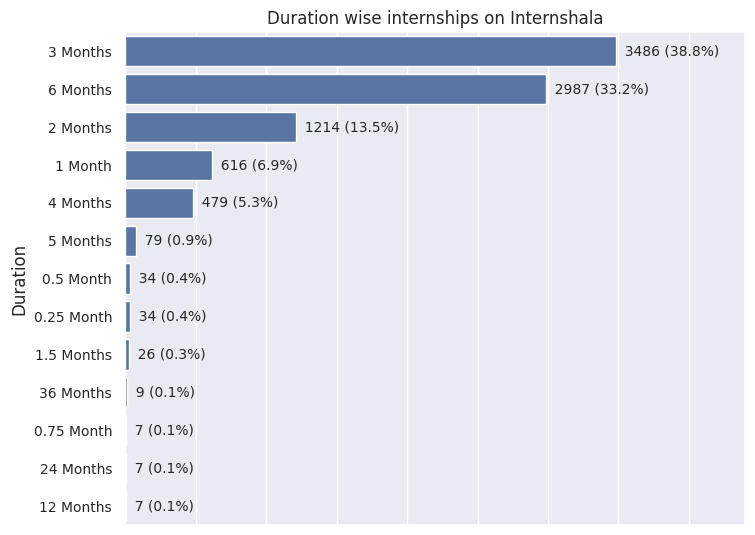

In [207]:
total = data.shape[0]
abs_values = _['Count'].apply(lambda x: "  "+str(x)+" ("+str((round(x/total*100,1)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Duration',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,4400))
ax.tick_params(bottom=False)
ax.set(title='Duration wise internships on Internshala')
plt.savefig('static/duration-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


In [208]:
_ = pd.DataFrame.from_dict(skills_list_toPlot,orient='index').reset_index()[0:20]
_.rename(columns={'index':'Skills',0:'Count'},inplace=True)

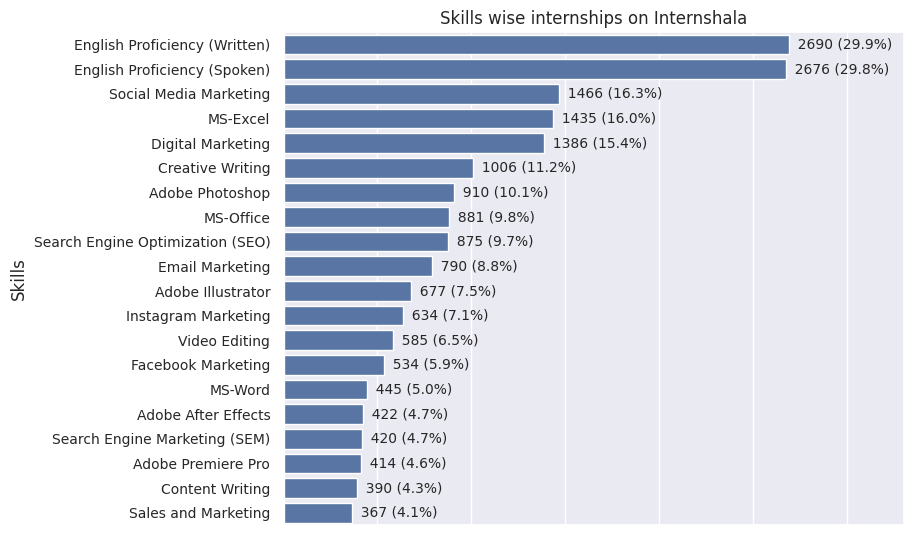

In [209]:
total = data.shape[0]
abs_values = _['Count'].apply(lambda x: "  "+str(x)+" ("+str((round(x/total*100,1)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Skills',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,3300))
ax.tick_params(bottom=False)
ax.set(title='Skills wise internships on Internshala')
plt.savefig('static/skills-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


In [210]:
_ = pd.DataFrame.from_dict(locations_list_toPlot,orient='index').reset_index()[0:20]
_.rename(columns={'index':'Locations',0:'Count'},inplace=True)

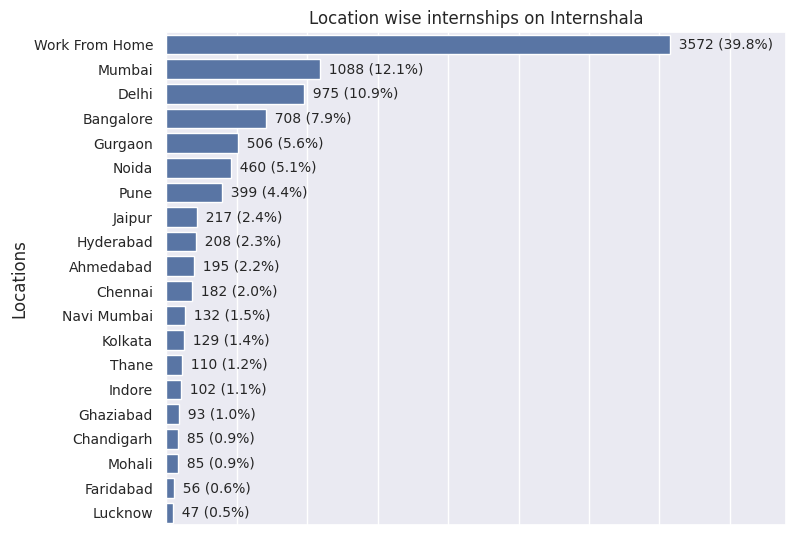

In [211]:
total = data.shape[0]
abs_values = _['Count'].apply(lambda x: "  "+str(x)+" ("+str((round(x/total*100,1)))+"%)")
plt.rcParams['font.size'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax =  sns.barplot(x='Count',y='Locations',data=_,label='Total',color='b')
ax.bar_label(container=ax.containers[0],labels=abs_values)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set(xlim=(0,4400))
ax.tick_params(bottom=False)
ax.set(title='Location wise internships on Internshala')
plt.savefig('static/locations-barplot.png',dpi=300, bbox_inches='tight')
plt.show()


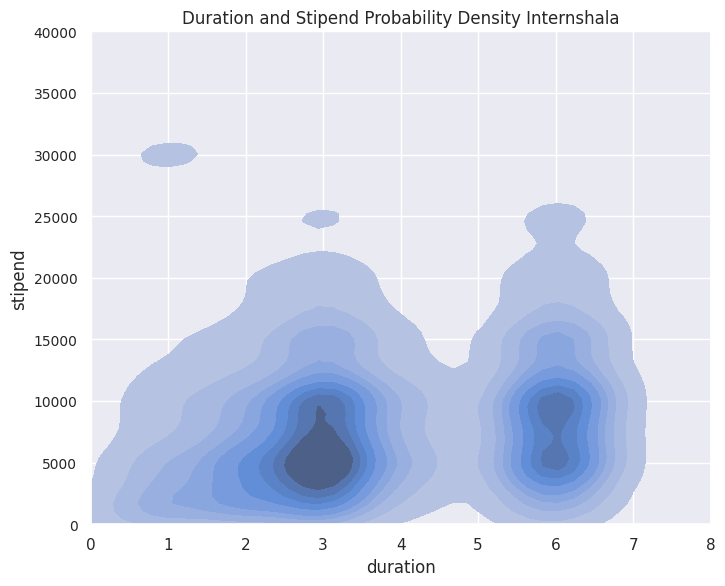

In [212]:
# For plotting KDE of duration and stipend, there are almost no values above 40000 stipend and almost no values above 8 for duration
ax = sns.kdeplot(data=data,x='duration',y='stipend',shade=True)
ax.set(xlim=(0,8))
ax.set(ylim=(0,40000))
ax.set(title='Duration and Stipend Probability Density Internshala')
plt.savefig('static/duration-stipend-kde.png',dpi=300, bbox_inches='tight')
plt.show()

### Statistical Analysis

Stipend Distribution

Skewness =  2.23 Right Skewed
Kurtosis =  17.18 Leptokurtic


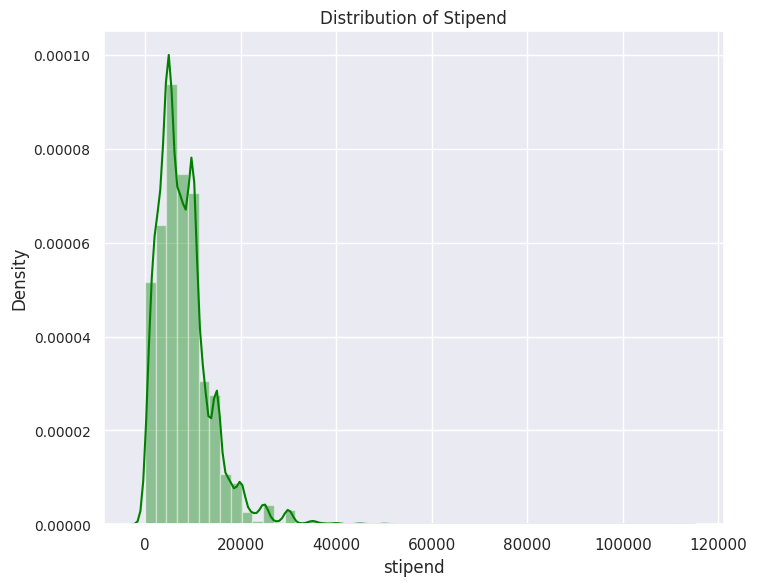

In [213]:
# We check the distribution of stipend
sns.distplot(data['stipend'], color='green').set(title='Distribution of Stipend')
print("Skewness = ", round(data['stipend'].skew(),2),"Right Skewed")
print("Kurtosis = ", round(data['stipend'].kurt(),2),"Leptokurtic")

The distribution shows that the data has outliers. Confirming same with Boxplot and then removing them.

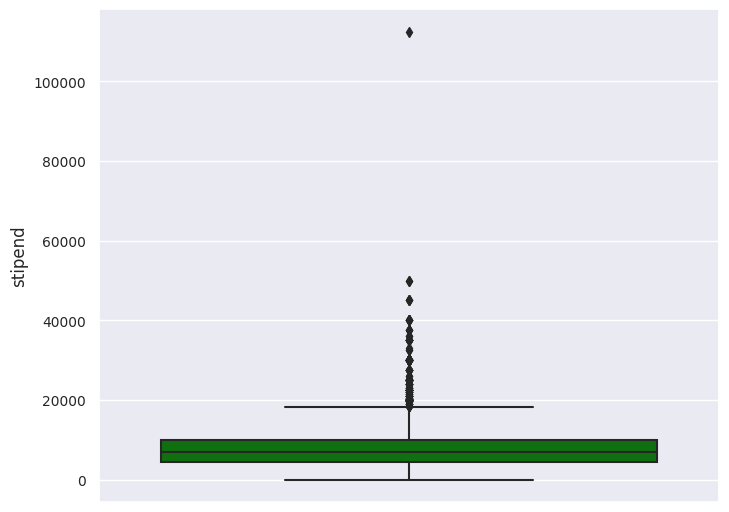

In [214]:
sns.boxplot(data=data, y='stipend',color='green')
plt.show()

In [215]:
q3 = np.quantile(data['stipend'],0.75)
q1 = np.quantile(data['stipend'],0.25)
iqr = q3-q1
upper = q3+(1.5*iqr)
print("Upper bound of outliers: Rs",upper)
print("From the boxplot, it is very clear that there is no outlier below bower bound.")
print("Number of datapoints outside upper bound is ",data[data['stipend']>upper].shape[0]," which is ",data[data['stipend']>upper].shape[0]/data.shape[0]*100,"% of total data")

Upper bound of outliers: Rs 18250.0
From the boxplot, it is very clear that there is no outlier below bower bound.
Number of datapoints outside upper bound is  429  which is  4.774624373956595 % of total data


There is no reason to term these data points outside the upper bound to be considered outliers considering that it is totally possible for few companies to offer higher stipends. However, according to the boxplot, there are extreme values that can affect the analysis. After closely looking at the distribution and after several iterations of different values, it can be safe to consider removing data points above Rs 30000 stipend.

Number of datapoints outside upper bound is  253  which is  2.8158041179744018 % of total data remaining
Skewness =  0.51 Right Skewed
Kurtosis =  -0.41 Leptokurtic


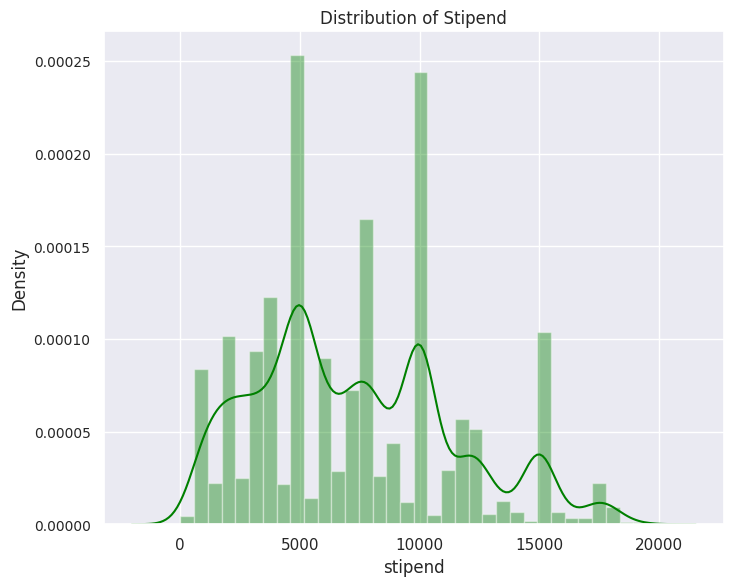

In [216]:
outlier_bound = 20000
print("Number of datapoints outside upper bound is ",data[data['stipend']>outlier_bound].shape[0]," which is ",data[data['stipend']>outlier_bound].shape[0]/data.shape[0]*100,"% of total data remaining")
sns.distplot(data[data['stipend']<outlier_bound]['stipend'], color='green').set(title='Distribution of Stipend')
print("Skewness = ", round(data[data['stipend']<outlier_bound]['stipend'].skew(),2),"Right Skewed")
print("Kurtosis = ", round(data[data['stipend']<outlier_bound]['stipend'].kurt(),2),"Leptokurtic")

In [217]:
data.drop(data[data['stipend']>=outlier_bound].index,axis=0,inplace=True)

There is still a lot of skewness in the data. Therefore trying various transformations

Log Transformation

Skewness before transformation:  0.51
Skewness after transformation:  -1.06


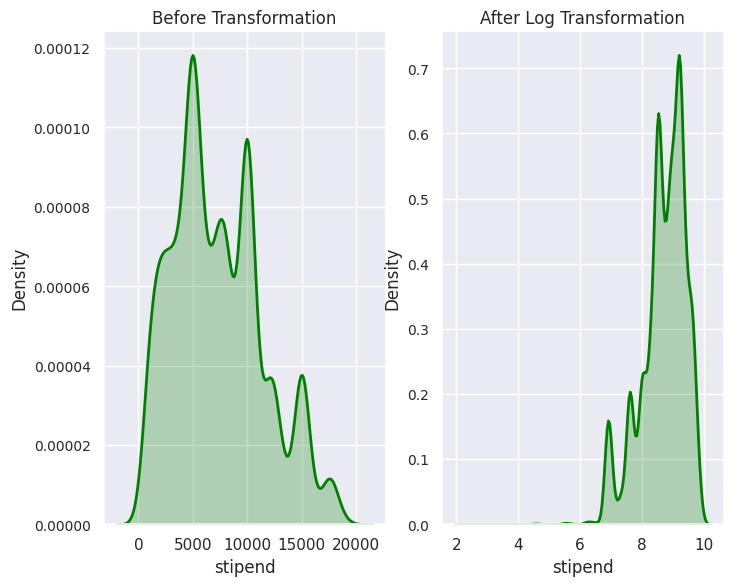

In [218]:
fig, ax = plt.subplots(1,2)
sns.distplot(data['stipend'],ax=ax[0],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title='Before Transformation')
sns.distplot(np.log(data['stipend']),ax=ax[1],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title="After Log Transformation")
print("Skewness before transformation: ",round(data['stipend'].skew(),2))
print("Skewness after transformation: ",round(np.log(data['stipend']).skew(),2))

Box-Cox Transformation

Skewness before transformation:  0.51
Skewness after transformation:  -0.09


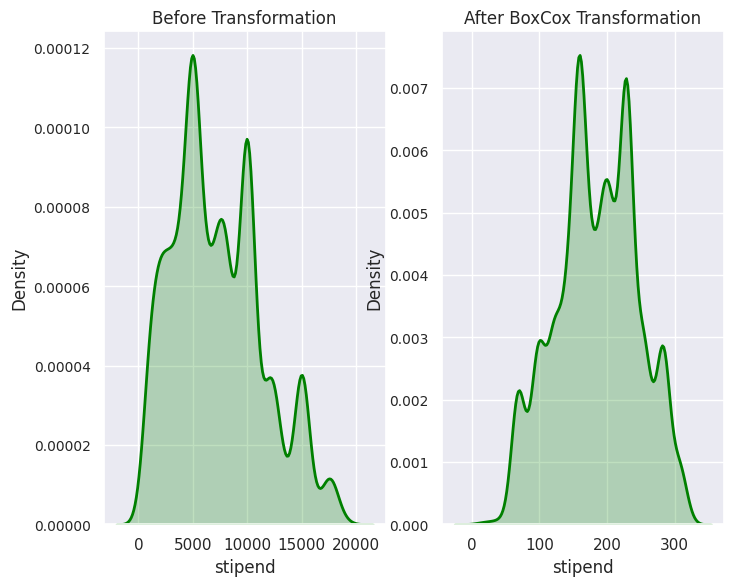

In [219]:
fig, ax = plt.subplots(1,2)

fit,lam = stats.boxcox(data['stipend'])

sns.distplot(data['stipend'],ax=ax[0],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title='Before Transformation')
sns.distplot(boxcox(data['stipend'],lam),ax=ax[1],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title="After BoxCox Transformation")
print("Skewness before transformation: ",round(data['stipend'].skew(),2))
print("Skewness after transformation: ",round(boxcox(data['stipend'],lam).skew(),2))

Square Root Transformation

Skewness before transformation:  0.51
Skewness after transformation:  -0.11


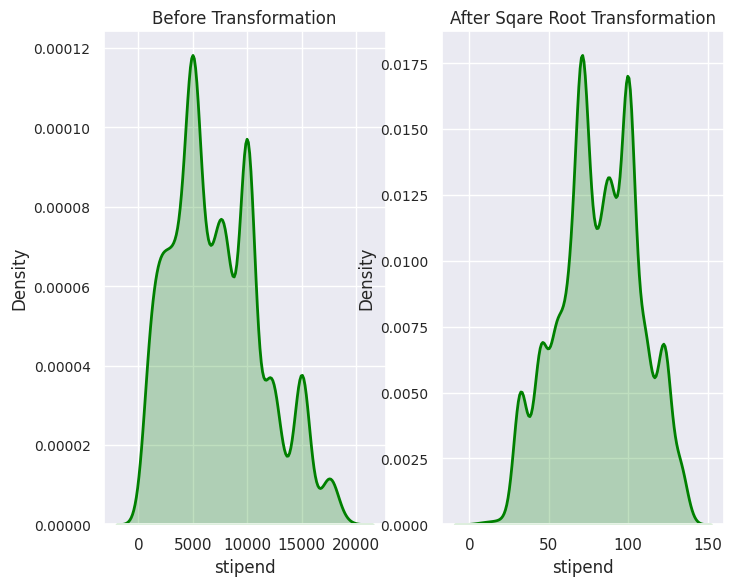

In [220]:
fig, ax = plt.subplots(1,2)
sns.distplot(data['stipend'],ax=ax[0],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title='Before Transformation')
sns.distplot(np.sqrt(data['stipend']),ax=ax[1],color='green',hist=False,kde_kws={'shade':True,'linewidth':2}).set(title="After Sqare Root Transformation")
print("Skewness before transformation: ",round(data['stipend'].skew(),2))
print("Skewness after transformation: ",round(np.sqrt(data['stipend']).skew(),2))

Storing all the transformed values for later use.

In [221]:
data["stipend_log"] = np.log(data["stipend"])
data["stipend_sqrt"] = np.sqrt(data["stipend"])
data["stipend_boxcox"] = boxcox(data["stipend"], lam)

## Model Building

### Feature Selection

While going further, feature selection is required. Only the features that are relevant to the end user to predict stipend are kept. This also helps in making a more generalized model. Features taken into consideration are:

- Duration

- Skills (That a user has)

- Perks (The user wants)

- Category

- Location

### Dummy Variables

The dummy variables created during preprocessing phase are combined and other irrelevant features are dropped.

In [222]:
final_df = data.copy()
final_df = final_df.join(skills_dummies).join(location_dummies).join(perk_dummies).join(category_dummies)
# final_df = final_df.join(skills_dummies).join(location_dummies).join(perk_dummies)

In [223]:
final_df.drop(['category','company','location','start_date','apply_by','applicants','skills_required','perks','openings','link'],axis=1,inplace=True)

In [224]:
final_df.shape

(8569, 1450)

### Selection of Model

For the dataset, there can be various models suitable, however, going with Light Gradient Boosting Machine (LGBM) Regressor. The reason is that for a very large dataset and for a very large feature set, LGBM is efficient and takes low memory to run. Further, regularization can be performed later.

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

Preparing Input and Target sets

In [226]:
X = final_df.drop(['stipend','stipend_log','stipend_sqrt','stipend_boxcox'],axis=1)
y, ylog, ysqrt, yboxcox = final_df['stipend'], final_df['stipend_log'], final_df['stipend_sqrt'], final_df['stipend_boxcox']

Scaling the data

In [227]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Selection of Transformed Variable

There were 3 different transformed and one untransformed target variable, so all these values are fitted on the vanilla LGBM model and evaluated to select the best one.

In [228]:
# Dividing train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X1_train, X1_test, y1_train, y1_test = train_test_split((X_scaled), ylog, test_size=0.2, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split((X_scaled), yboxcox, test_size=0.2, random_state=10)
X3_train, X3_test, y3_train, y3_test = train_test_split((X_scaled), ysqrt, test_size=0.2, random_state=10)

In [229]:
# Fitting of non transformed data on LGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train,y_train)
print("Non Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X_train,y_train))
print("Test set R squared value: ",lgbm_model.score(X_test,y_test))
print("Train Set MSE: ",mean_squared_error(y_train,lgbm_model.predict(X_train)))
print("Test Set MSE: ",mean_squared_error(y_test,lgbm_model.predict(X_test)))

Non Transformed Data:
Train set R squared value:  0.3963321843450921
Test set R squared value:  0.19461474178749505
Train Set MSE:  10315078.147100808
Test Set MSE:  13636030.220459359


In [230]:
# Fitting of log transformed data on LGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X1_train,y1_train)
print("Log Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X1_train,y1_train))
print("Test set R squared value: ",lgbm_model.score(X1_test,y1_test))
print("Train Set MSE: ",mean_squared_error(np.exp(y1_train),np.exp(lgbm_model.predict(X1_train))))
print("Test Set MSE: ",mean_squared_error(np.exp(y1_test),np.exp(lgbm_model.predict(X1_test))))

Log Transformed Data:
Train set R squared value:  0.42173142754044335
Test set R squared value:  0.24935055292823693
Train Set MSE:  11554868.102630842
Test Set MSE:  14182078.840641266


In [231]:
# Fitting of square root transformed data on LGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X3_train,y3_train)
print("Square Root Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X3_train,y3_train))
print("Test set R squared value: ",lgbm_model.score(X3_test,y3_test))
print("Train Set MSE: ",mean_squared_error(np.square(y3_train),np.square(lgbm_model.predict(X3_train))))
print("Test Set MSE: ",mean_squared_error(np.square(y3_test),np.square(lgbm_model.predict(X3_test))))

Square Root Transformed Data:
Train set R squared value:  0.4133408990564783
Test set R squared value:  0.22899802288224136
Train Set MSE:  10606384.783161651
Test Set MSE:  13655520.53228136


In [232]:
# Fitting of BoxCox transformed data on LGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X2_train,y2_train)
print("BoxCox Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X2_train,y2_train))
print("Test set R squared value: ",lgbm_model.score(X2_test,y2_test))
print("Train Set MSE: ",mean_squared_error(inv_boxcox(y2_train,lam),inv_boxcox(lgbm_model.predict(X2_train),lam)))
print("Test Set MSE: ",mean_squared_error(inv_boxcox(y2_test,lam),inv_boxcox(lgbm_model.predict(X2_test),lam)))

BoxCox Transformed Data:
Train set R squared value:  0.412804770637039
Test set R squared value:  0.2323450545934479
Train Set MSE:  10589726.866346393
Test Set MSE:  13561230.619544595


Box-Cox Transformation and Log Transformation both have almost the same values. Therefore anyone can be used to proceed further

### Model Tuning

Tuning an LGBM Model can be a lengthy task. Fortunately, there are a few libraries that automate these processes. Verstack is known to be very useful to tune LGBM Models.

In [233]:
X1_train_df = pd.DataFrame(X1_train,columns=X.columns)
X1_test_df = pd.DataFrame(X1_test,columns=X.columns)
y1_train_df = pd.Series(y1_train)
y1_test_df = pd.Series(y1_test)

X2_train_df = pd.DataFrame(X2_train,columns=X.columns)
X2_test_df = pd.DataFrame(X2_test,columns=X.columns)
y2_train_df = pd.Series(y2_train)
y2_test_df = pd.Series(y2_test)

X3_train_df = pd.DataFrame(X3_train,columns=X.columns)
X3_test_df = pd.DataFrame(X3_test,columns=X.columns)
y3_train_df = pd.Series(y3_train)
y3_test_df = pd.Series(y3_test)



Verstack can optimize the best model based on many metrics. "Mean Squared Error' is a great metric for this data.

2023-04-14 11:32:00.571314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 11:32:00.928259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-14 11:32:00.928313: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-14 11:32:01.006004: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-14 11:32:04.467331: W tensorflow/stream_executor/platform/de

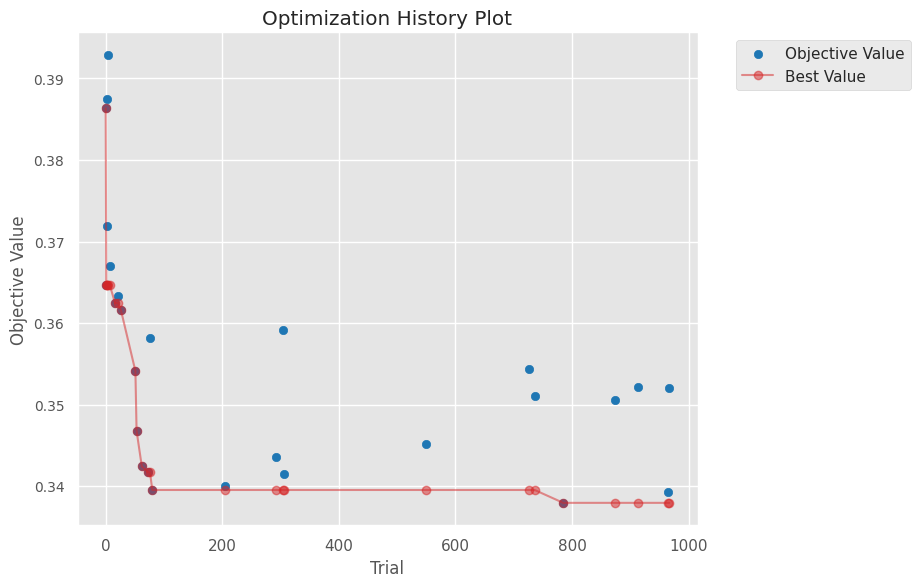

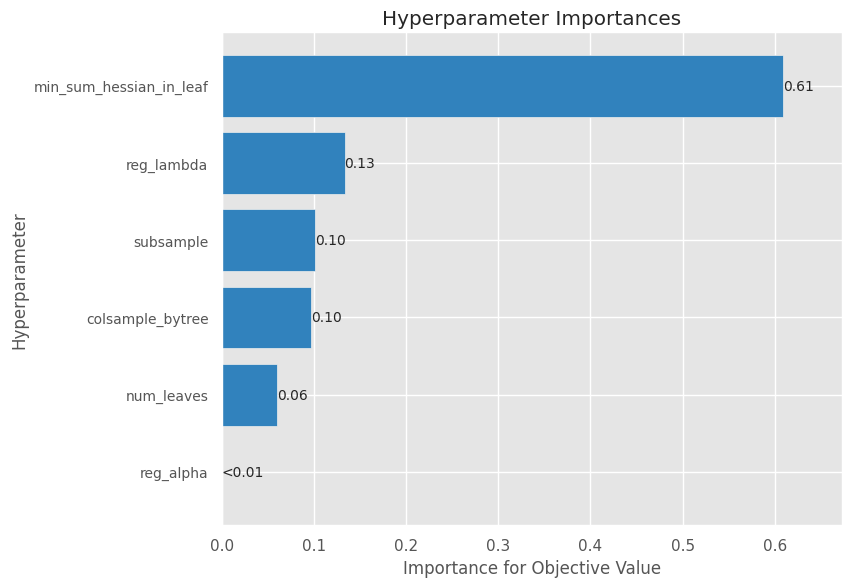

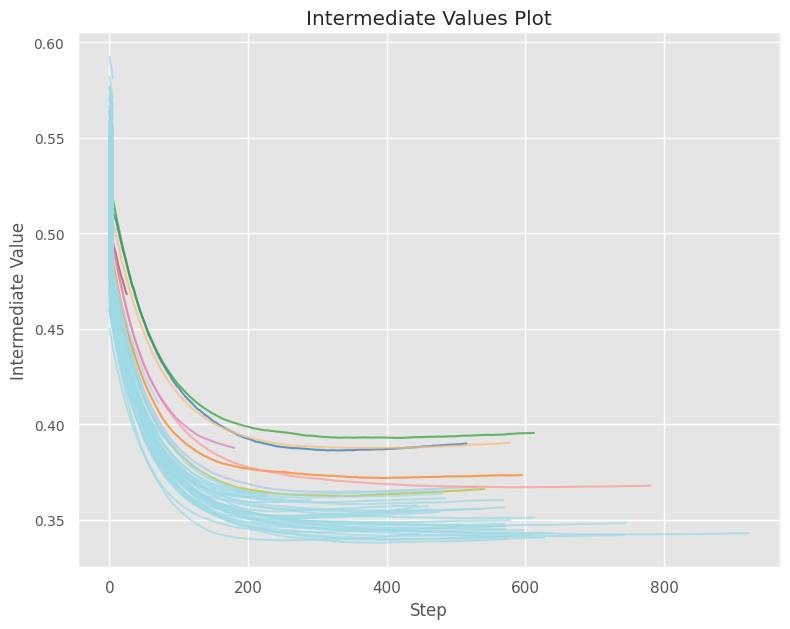

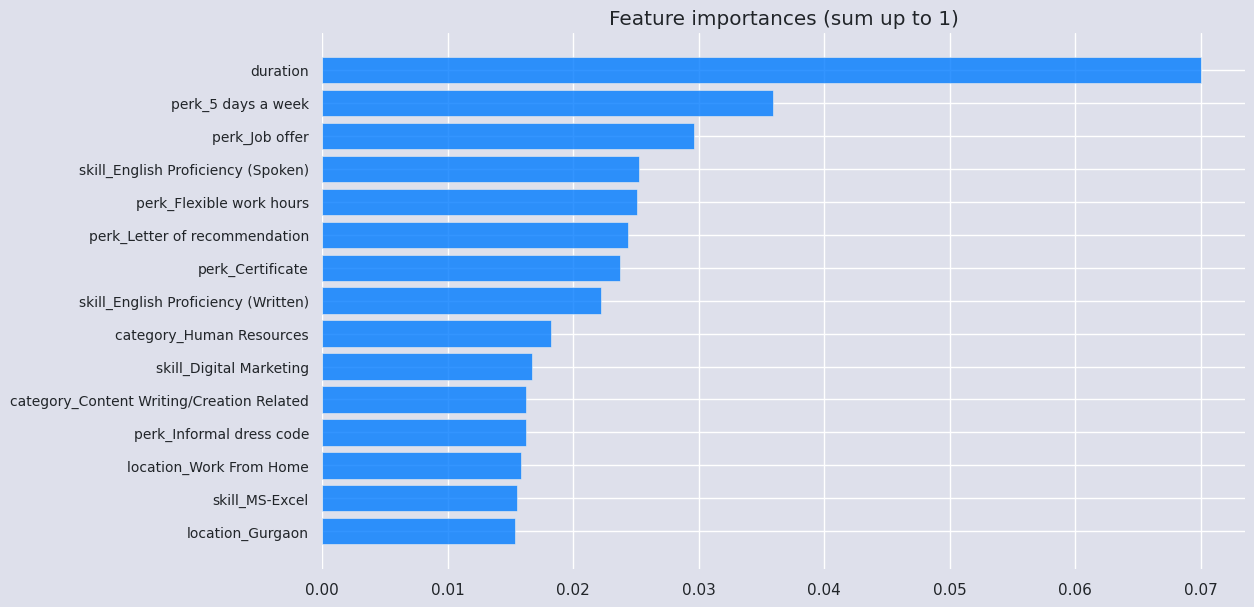


     . Optuna hyperparameters optimization finished
     .. Best trial number:785    |     mean_squared_error:          0.33793575419165606
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  513   |     r2:          0.27091577138602585

Time elapsed for fit execution: 16 min 43.234 sec


In [234]:
from verstack import LGBMTuner
tuner1 = LGBMTuner(metric='r2',visualizations=False,seed=289232,trials=1000)
tuner1.fit(X1_train_df, y1_train_df)


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 1000 trials
     .. Evaluation metric: r2 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 2593.1151099181634
     .. Evaluation score (greater-better): r2: 0.26037304443600373
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 2704.1586327787923
     .. Evaluation score (greater-better): r2: 0.25374119919882787
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 2707.9896826768963
     .. Evaluation score (greater-better): r2: 0.25188080783368794
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-be

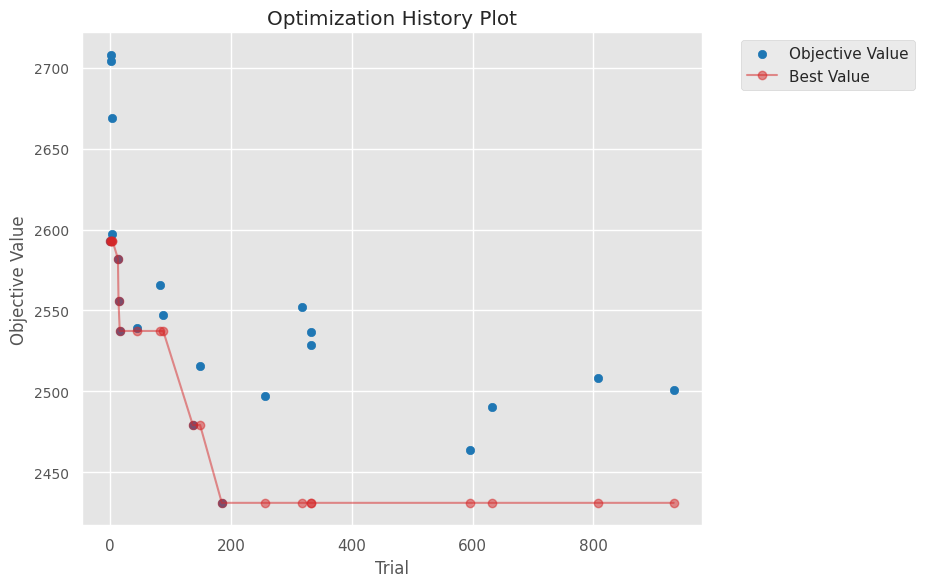

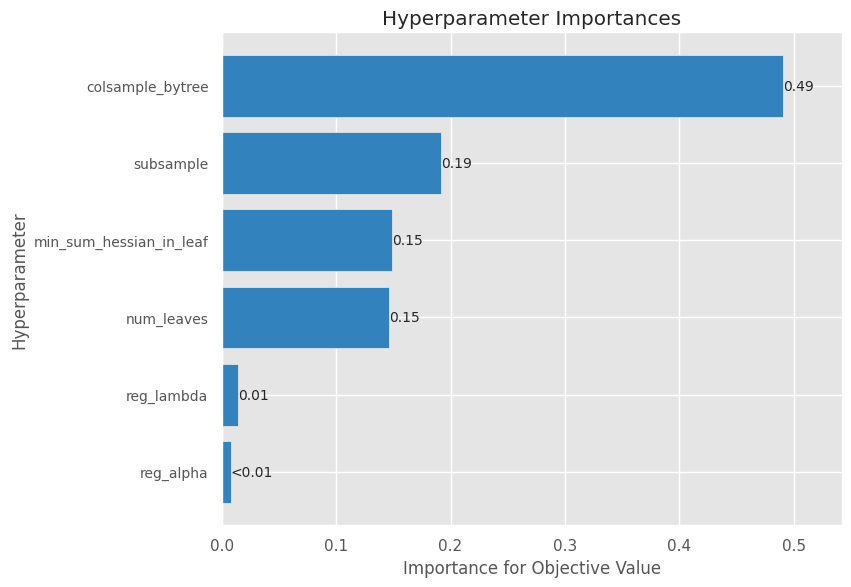

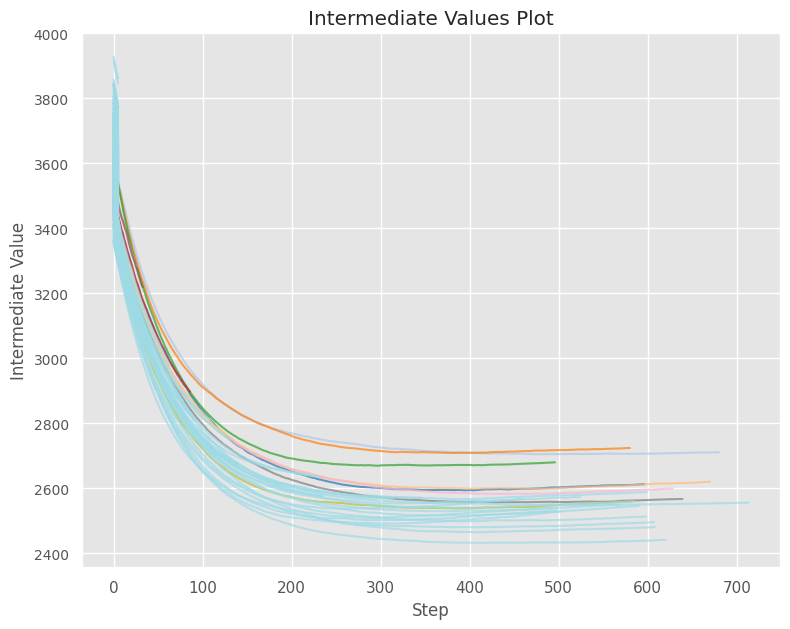

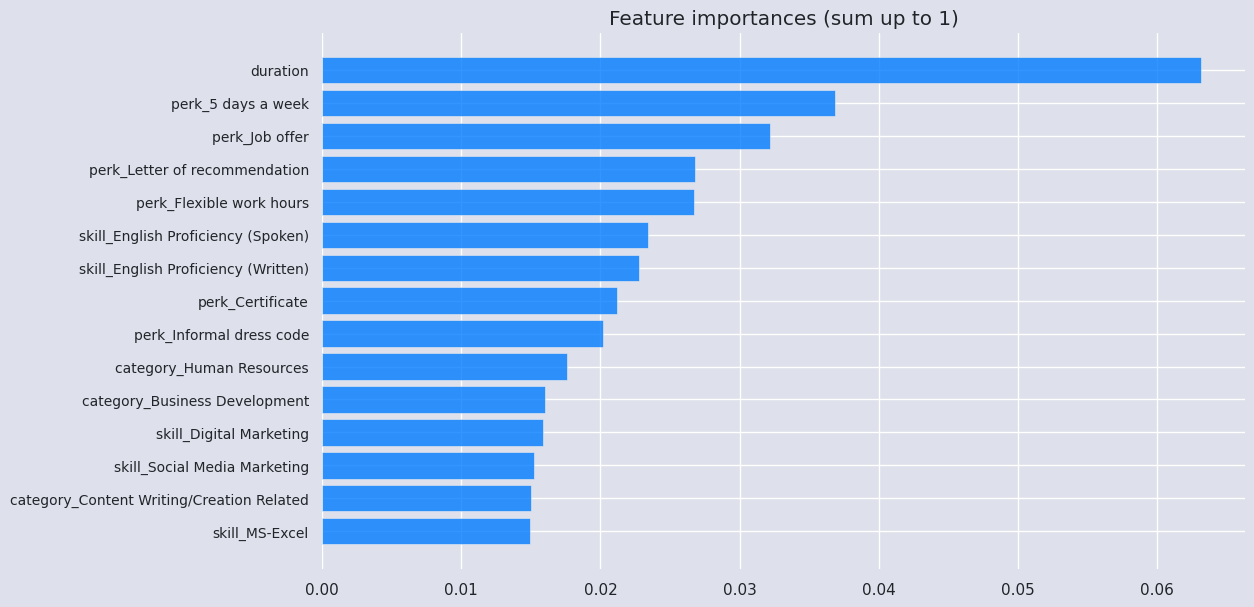


     . Optuna hyperparameters optimization finished
     .. Best trial number:185    |     mean_squared_error:            2431.007150506493
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  508   |     r2:           0.2623113554798423

Time elapsed for fit execution: 16 min 53.134 sec


In [235]:
tuner2 = LGBMTuner(metric='r2',visualizations=False,seed=289232,trials=100)
tuner2.fit(X2_train_df, y2_train_df)


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 1000 trials
     .. Evaluation metric: r2 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 472.23480489386174
     .. Evaluation score (greater-better): r2: 0.25688910861729986
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 468.9296185833284
     .. Evaluation score (greater-better): r2: 0.25527339253628534
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 473.5310423771928
     .. Evaluation score (greater-better): r2: 0.25856395562194945
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-bett

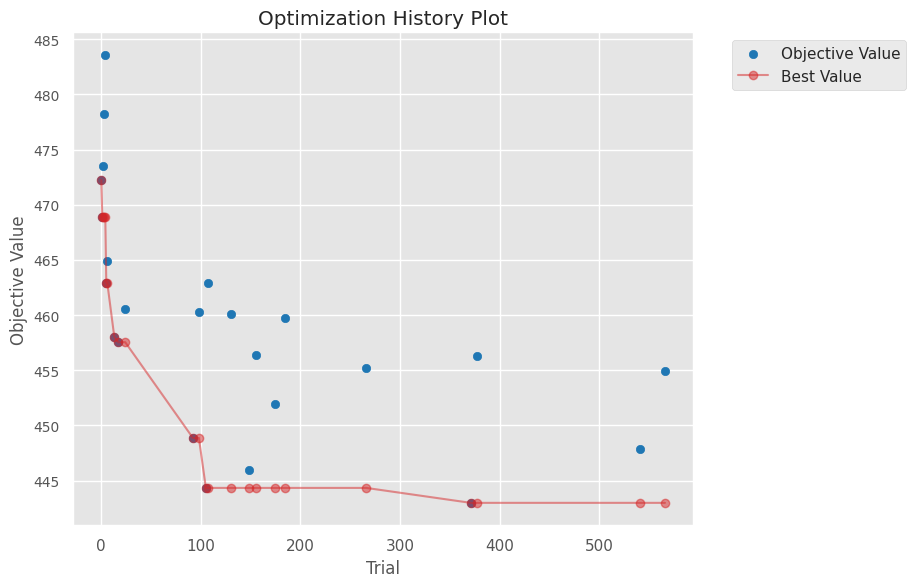

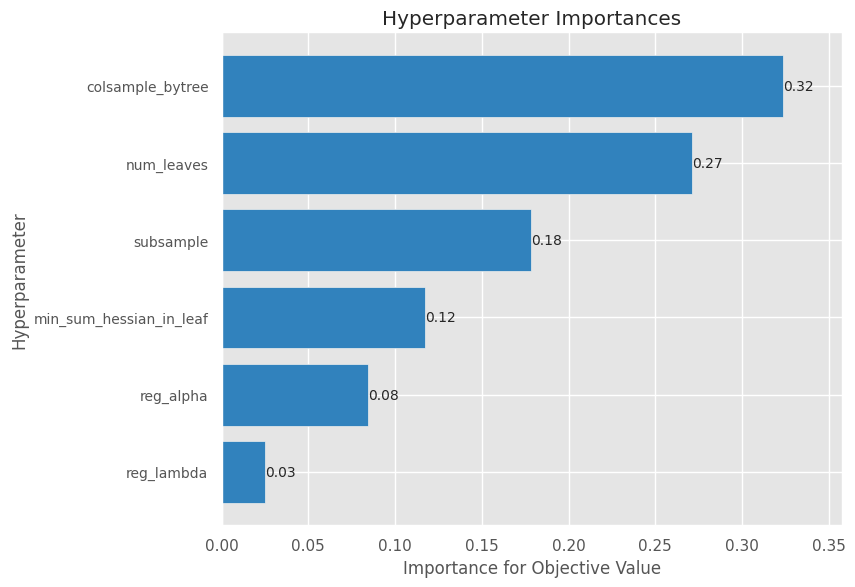

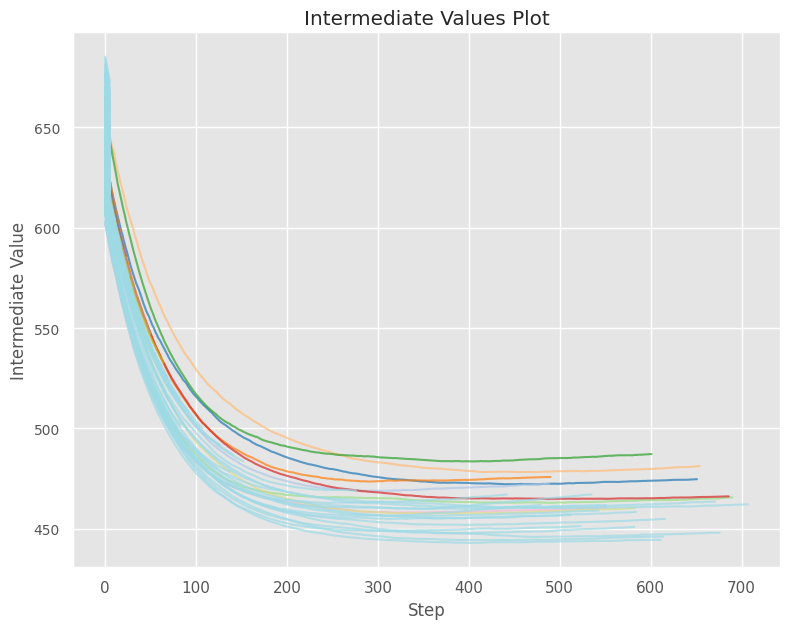

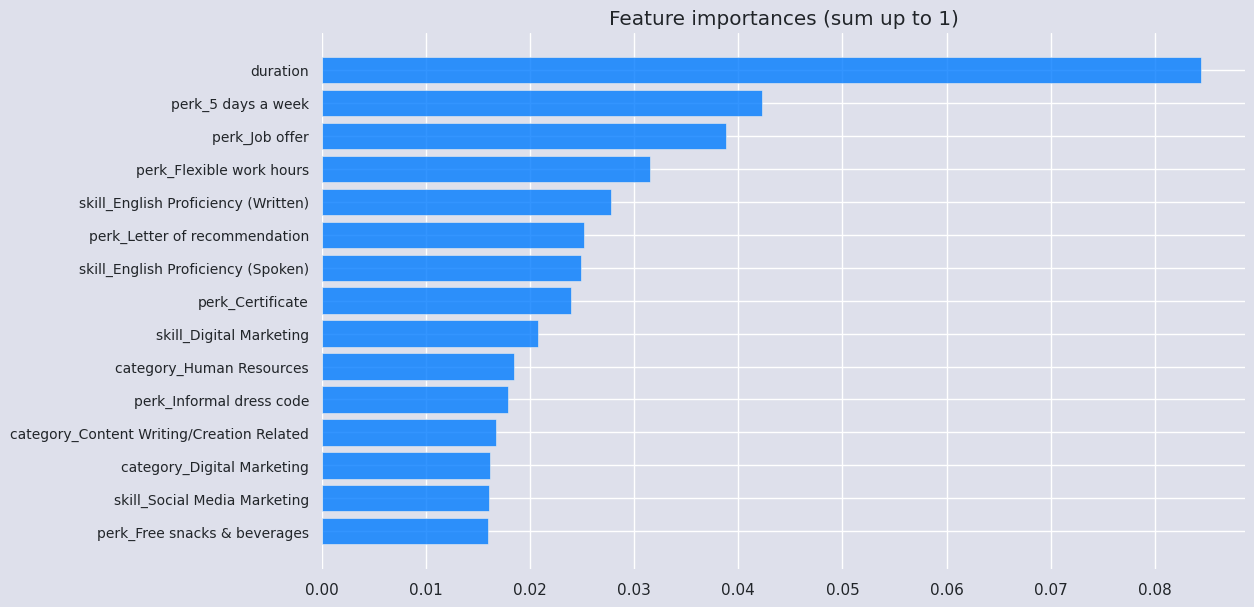


     . Optuna hyperparameters optimization finished
     .. Best trial number:371    |     mean_squared_error:            442.9875656867241
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  455   |     r2:           0.2601786416161983

Time elapsed for fit execution: 15 min 27.146 sec


In [236]:
tuner3 = LGBMTuner(metric='r2',visualizations=False,seed=289232,trials=100)
tuner3.fit(X3_train_df, y3_train_df)

### Model Evaluation

Model evaluation is an important part of model building.

Model Evaluation for log-transformed data

In [237]:
params = tuner1.best_params
lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(X1_train,y1_train)
print("Log Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X1_train,y1_train))
print("Test set R squared value: ",lgbm_model.score(X1_test,y1_test))
print("Train Set MSE: ",mean_squared_error(np.exp(y1_train),np.exp(lgbm_model.predict(X1_train))))
print("Test Set MSE: ",mean_squared_error(np.exp(y1_test),np.exp(lgbm_model.predict(X1_test))))

Log Transformed Data:
Train set R squared value:  0.39764992130348764
Test set R squared value:  0.2539452497894289
Train Set MSE:  12047344.144963907
Test Set MSE:  14061137.883653285


In [241]:
params = tuner3.best_params
lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(X3_train,y3_train)
print("Square Root Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X3_train,y3_train))
print("Test set R squared value: ",lgbm_model.score(X3_test,y3_test))
print("Train Set MSE: ",mean_squared_error(np.square(y3_train),np.square(lgbm_model.predict(X3_train))))
print("Test Set MSE: ",mean_squared_error(np.square(y3_test),np.square(lgbm_model.predict(X3_test))))

[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0020821033646229864, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0020821033646229864
Square Root Transformed Data:
Train set R squared value:  0.489974552179426
Test set R squared value:  0.23587484707250062
Train Set MSE:  9235793.528921314
Test Set MSE:  13438881.931826517


In [239]:
params = tuner2.best_params
lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(X2_train,y2_train)
print("BoxCox Transformed Data:")
print("Train set R squared value: ",lgbm_model.score(X2_train,y2_train))
print("Test set R squared value: ",lgbm_model.score(X2_test,y2_test))
print("Train Set MSE: ",mean_squared_error(inv_boxcox(y2_train,lam),inv_boxcox(lgbm_model.predict(X2_train),lam)))
print("Test Set MSE: ",mean_squared_error(inv_boxcox(y2_test,lam),inv_boxcox(lgbm_model.predict(X2_test),lam)))

[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7.414932676396845, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7.414932676396845
BoxCox Transformed Data:
Train set R squared value:  0.4049167408292693
Test set R squared value:  0.24130017899651646
Train Set MSE:  10750905.449814767
Test Set MSE:  13371460.191121813


As the model with Square Root Transformed data provides a better R-squared value, the same model is saved for further deployment.

In [242]:
import pickle
file1 = open('Sq_model.pkl','wb')
pickle.dump(tuner3,file1)
file2 = open("scaler.pkl",'wb')
pickle.dump(scaler,file2)
file3 = open('X_columns.pkl','wb')
pickle.dump(X.columns,file3)
file1.close()
file2.close()
file3.close()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c427d69-f595-44e2-a4f3-06d5ebe7d930' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>